## **Task Submitted By : Kundan Kumar**



### **Prediction using Supervised Machine Learning**

*   **Task** : Predict the percentage of an student based on the number of study hours.
*   **Dataset** : Student Scores dataset

### Data Science & Business Analytics Internship @**THE SPARKS FOUNDATION**(GRIP - July Batch)



In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
# importing the dataset
data_set = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(data_set)


In [3]:
# See the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# See the first 10 rows of the data
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# checking null values in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

As there is no null values in the dataset, we can now visualize our data and see if we can manually find any relationship between the data.

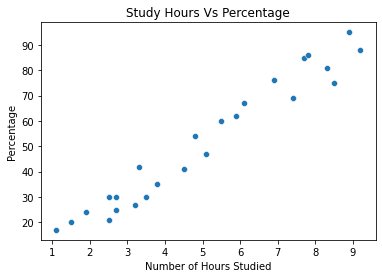

In [6]:
# Plotting the distribution of scores
sns.scatterplot(x= data['Hours'], y= data['Scores'])
plt.title('Study Hours Vs Percentage')
plt.ylabel('Percentage')
plt.xlabel('Number of Hours Studied')
plt.show()

From the above scatterplot, we can clearly see that there is a positive linear relation between the "Number of hours studied" and "Percentage".


### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [7]:
# X -> attributes || y -> labels

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method.



In [8]:
# Splitting the data (Training & Test datasets)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


We have split the dataset as - 75% Training data and 25% Test data


### **Training the Model**

Using Linear Regression to train the model from Sklearn linear model

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  
lr.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plotting a regression line to show the correlation.

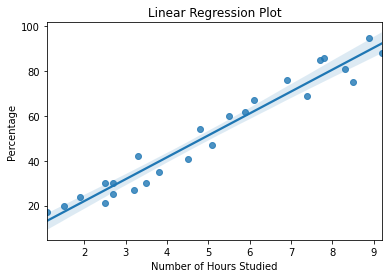

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [10]:
# Plotting the regression line
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Linear Regression Plot')
plt.ylabel('Percentage')
plt.xlabel('Number of Hours Studied')
plt.show()

# Correlation
print(data.corr())

### **Making Predictions**

In [11]:
print(X_test) # Testing data - In Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [12]:
y_pred = lr.predict(X_test) # Predicting the scores
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [13]:
# Comparing the Actual marks and the Predicted Marks
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


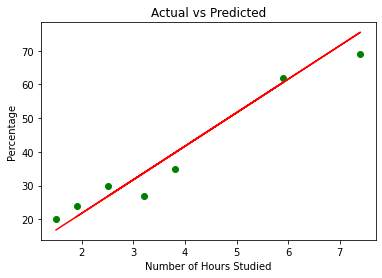

In [14]:
plt.scatter(x=X_test, y=y_test, color='green')
plt.plot(X_test, y_pred, color='red')
plt.title('Actual vs Predicted')
plt.ylabel('Percentage')
plt.xlabel('Number of Hours Studied')
plt.show()

In [15]:
# Testing with the own data 
hours = [9.25]
answer = lr.predict([hours])
print("Number of Hours Studied = {}".format(hours))
print("Predicted Score = {}".format(round(answer[0],3)))

Number of Hours Studied = [9.25]
Predicted Score = 93.893


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.


### **Evaluating the model**

In [16]:

from sklearn import metrics as m

print('Mean Absolute Error:', 
      m.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.130879918502482


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.
